# 빅콘테스트 퓨처스 부문
## 한중수교 / 김찬호, 김지민, 전민주, 조은정

## 1. 데이터 탐색
* 활용할 데이터를 탐색하기 위하여 user_spec, loan_result, log_data 파일을 각각 불러옵니다.

* user_spec : application_id, user_id 를 기준으로 수치형 변수 10개와 범주형 변수 5개로 이루어진 유저 스펙을 담은 데이터셋
* loan_result : application_id 를 기준으로 수치형 변수 6개와 범주형 변수 1개를 담은, 예측 모델링 시 타겟값이 되는 'is_applied' 컬럼을 담은 은행 및 대출상품 정보를 담은 데이터셋
* log_data : user_id를 기준으로 수치형 변수 1개, 범주형 변수 5개를 담은, 유저의 행동패턴을 담은 데이터셋

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

warnings.filterwarnings("ignore")

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

user_spec = pd.read_csv("user_spec.csv")
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")


In [2]:
user_spec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [3]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [4]:
loan_result.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [5]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [6]:
log_data.head()

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25


In [7]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


### 1-1 user_spec 데이터셋 분포 확인
> 수치형 변수 히스토그램

array([[<AxesSubplot:title={'center':'application_id'}>,
        <AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'birth_year'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'yearly_income'}>],
       [<AxesSubplot:title={'center':'company_enter_month'}>,
        <AxesSubplot:title={'center':'desired_amount'}>,
        <AxesSubplot:title={'center':'personal_rehabilitation_yn'}>],
       [<AxesSubplot:title={'center':'personal_rehabilitation_complete_yn'}>,
        <AxesSubplot:title={'center':'existing_loan_cnt'}>,
        <AxesSubplot:title={'center':'existing_loan_amt'}>]], dtype=object)

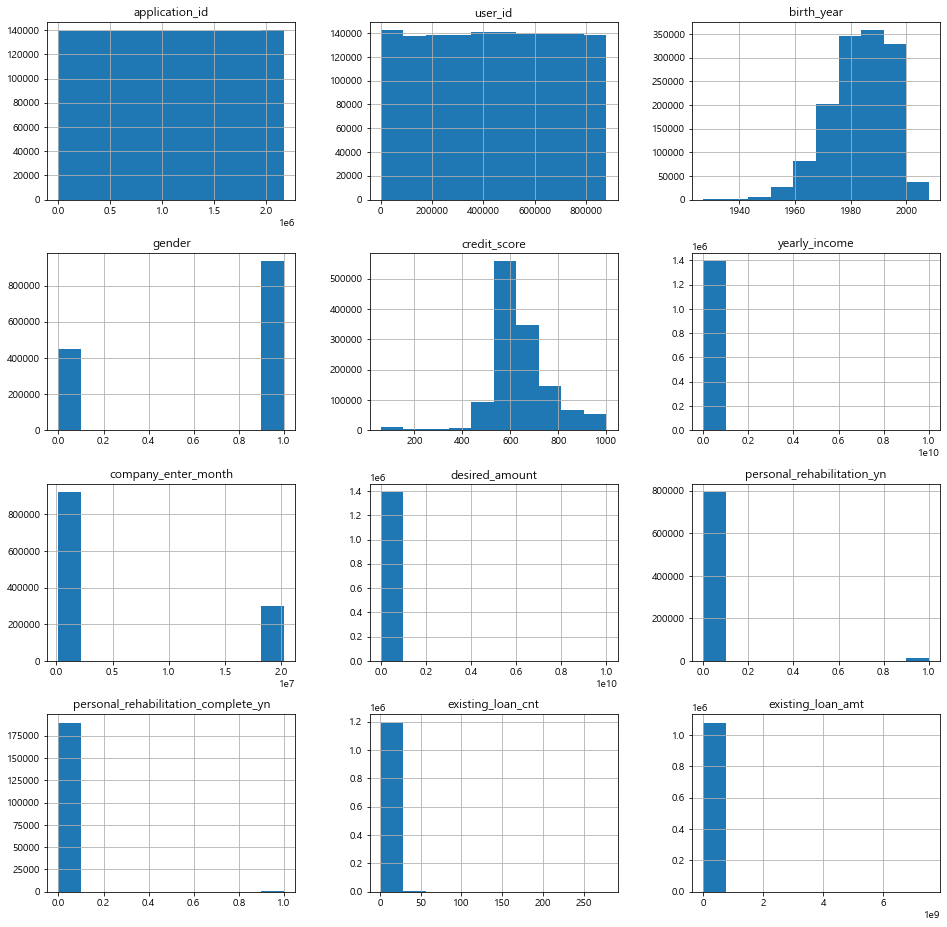

In [8]:
user_spec.hist(figsize=(16,16))


> 연속형 변수 분포 확인

In [9]:
print(user_spec['income_type'].unique())
print(user_spec['income_type'].value_counts())

['PRIVATEBUSINESS' 'FREELANCER' 'EARNEDINCOME' 'OTHERINCOME'
 'EARNEDINCOME2' 'PRACTITIONER' nan]
EARNEDINCOME       892579
OTHERINCOME        172600
PRIVATEBUSINESS    126108
FREELANCER         103913
EARNEDINCOME2       78806
PRACTITIONER        20125
Name: income_type, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'EARNEDINCOME'),
  Text(1, 0, 'OTHERINCOME'),
  Text(2, 0, 'PRIVATEBUSINESS'),
  Text(3, 0, 'FREELANCER'),
  Text(4, 0, 'EARNEDINCOME2'),
  Text(5, 0, 'PRACTITIONER')])

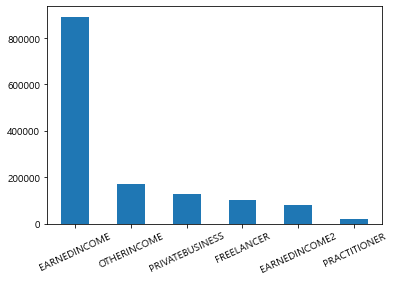

In [10]:

income= pd.value_counts(user_spec['income_type'].values, sort=True)
income.plot.bar()
plt.xticks(rotation=25)

In [11]:
print(user_spec['employment_type'].unique())
print(user_spec['employment_type'].value_counts())

['기타' '정규직' '계약직' '일용직' nan]
정규직    918032
기타     345801
계약직    111445
일용직     18853
Name: employment_type, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, '정규직'), Text(1, 0, '기타'), Text(2, 0, '계약직'), Text(3, 0, '일용직')])

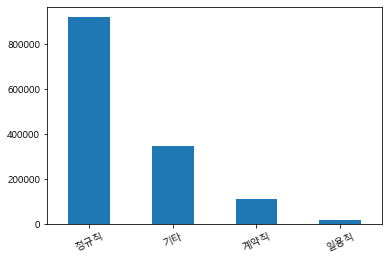

In [12]:
employ= pd.value_counts(user_spec['employment_type'].values, sort=True)
employ.plot.bar()
plt.xticks(rotation=25)

In [13]:
print(user_spec['houseown_type'].unique())
print(user_spec['houseown_type'].value_counts())

['자가' '기타가족소유' '전월세' '배우자' nan]
전월세       642838
기타가족소유    465893
자가        283454
배우자         1946
Name: houseown_type, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, '전월세'),
  Text(1, 0, '기타가족소유'),
  Text(2, 0, '자가'),
  Text(3, 0, '배우자')])

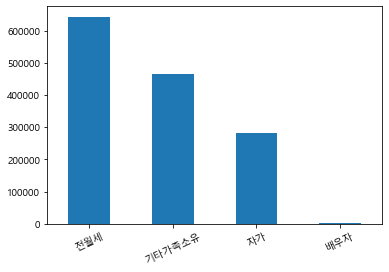

In [14]:
houseown= pd.value_counts(user_spec['houseown_type'].values, sort=True)
houseown.plot.bar()
plt.xticks(rotation=25)

In [15]:
print(user_spec['purpose'].unique())
print(user_spec['purpose'].value_counts())

['기타' '대환대출' '생활비' '사업자금' '주택구입' '전월세보증금' '투자' 'LIVING' 'SWITCHLOAN' 'ETC'
 'INVEST' '자동차구입' 'BUSINESS' 'BUYCAR' nan 'HOUSEDEPOSIT' 'BUYHOUSE']
생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64


> purpose 컬럼의 경우 동일한 의미의 영문과 한글이 혼재하므로, 영어 -> 한글 표현으로 변경해준다. 

In [16]:
user_spec = user_spec.replace({'purpose':'LIVING' },'생활비' )
user_spec = user_spec.replace({'purpose':'SWITCHLOAN' },'대환대출')
user_spec = user_spec.replace({'purpose':'ETC' },'기타' )
user_spec = user_spec.replace({'purpose':'INVEST' },'투자' )
user_spec = user_spec.replace({'purpose':'BUSINESS' },'사업자금' )
user_spec = user_spec.replace({'purpose':'BUYCAR' },'자동차구입' )
user_spec = user_spec.replace({'purpose':'HOUSEDEPOSIT' },'전월세보증금' )
user_spec = user_spec.replace({'purpose':'BUYHOUSE' },'주택구입' )

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '생활비'),
  Text(1, 0, '대환대출'),
  Text(2, 0, '사업자금'),
  Text(3, 0, '기타'),
  Text(4, 0, '전월세보증금'),
  Text(5, 0, '주택구입'),
  Text(6, 0, '투자'),
  Text(7, 0, '자동차구입')])

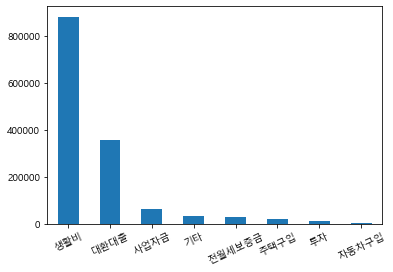

In [17]:
purpose= pd.value_counts(user_spec['purpose'].values, sort=True)
purpose.plot.bar()
plt.xticks(rotation=25)

> 생활비, 대환대출을 제외한 다른 purpose value -> etc 로 처리한다.

In [18]:
user_spec['purpose'].value_counts()

생활비       881511
대환대출      357042
사업자금       63050
기타         30725
전월세보증금     27798
주택구입       17778
투자         12698
자동차구입       3529
Name: purpose, dtype: int64

### 1-2 타겟값과 수치형 변수 간 상관관계

> user_spec 데이터셋과 loan_result 데이터셋의 타겟값인 'is_applied' 컬럼을 application_id 를 기준으로 join하고, user_spec 데이터셋 내 수치형 컬럼들과 is_applied 컬럼 간의 상관관계를 히트맵을 통해 확인한다.

In [19]:
is_applied = loan_result[['application_id', 'is_applied']]

In [20]:

is_applied = pd.merge(user_spec,is_applied, how='inner', on='application_id' )

[Text(0.5, 1.0, 'HeatMap')]

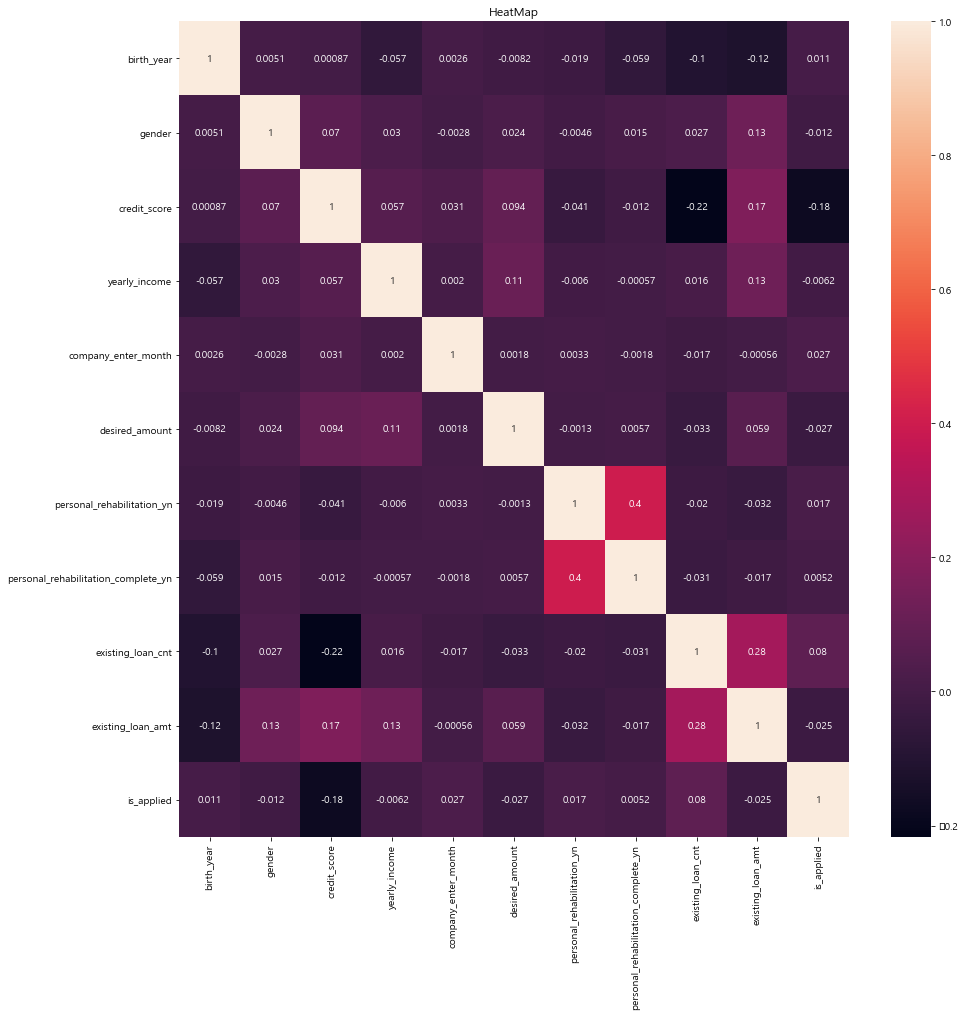

In [21]:
corrMat = is_applied[['birth_year','gender', 'credit_score', 'yearly_income', 
                      'company_enter_month', 'desired_amount', 'personal_rehabilitation_yn', 
                      'personal_rehabilitation_complete_yn', 'existing_loan_cnt', 'existing_loan_amt','is_applied']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
plt.xticks(rotation=-45)
sns.heatmap(corrMat, annot=True)
ax.set(title='HeatMap')


## 2. 파생변수 생성 [user_spec]

### 2-1. age_cat

In [22]:

user_spec['age'] = 2022 -user_spec['birth_year']

#나잇대로 변환
def age_categorize(age):
  age = (age//10)*10
  return age
age_cat = user_spec['age'].apply(age_categorize)
age_cat = age_cat.astype('category')
user_spec.insert(6, 'age_cat', age_cat)

<AxesSubplot:xlabel='age_cat', ylabel='Density'>

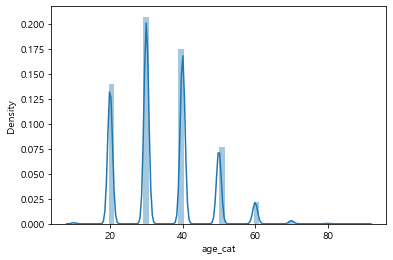

In [23]:
sns.distplot(user_spec['age_cat'])

### 2-2. work_year

In [24]:
user_spec['company_enter_month'] = user_spec['company_enter_month'].astype('str')
user_spec['company_enter_month'] = user_spec['company_enter_month'].str[0:4]
user_spec['company_enter_month'] = pd.to_datetime(user_spec['company_enter_month'])
user_spec['company_enter_year'] = user_spec['company_enter_month'].dt.year
user_spec['work_year'] = 2022 -user_spec['company_enter_year']

<AxesSubplot:xlabel='work_year', ylabel='Density'>

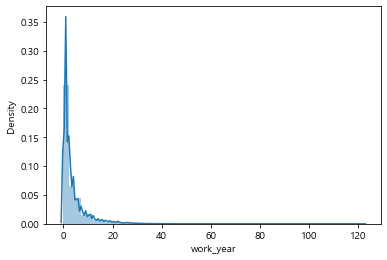

In [25]:
sns.distplot(user_spec['work_year'])

### 2-3. score_type

In [26]:
def score_categorize(credit_score):
    cat =''
    if credit_score <=334 : cat = '10'
    elif credit_score <=453 : cat = '9'
    elif credit_score <=529 : cat = '8'
    elif credit_score <=629 : cat = '7'
    elif credit_score <=697 : cat = '6'
    elif credit_score <=767 : cat ='5'
    elif credit_score <=831 : cat = '4'
    elif credit_score <=890 : cat = '3'
    elif credit_score <=941 : cat = '2'
    else : cat ='1'
    
    return cat

user_spec['score_type'] = user_spec['credit_score'].apply(lambda x : score_categorize(x))

<AxesSubplot:xlabel='score_type', ylabel='Density'>

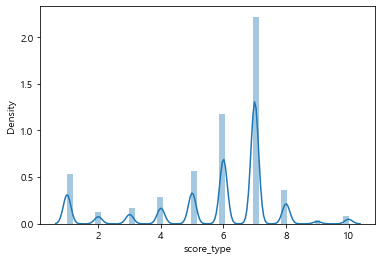

In [27]:
sns.distplot(user_spec['score_type'])





### 2-4. 기존변수들 삭제

In [28]:
user_spec.drop(['birth_year', 'age', 'company_enter_month', 'company_enter_year', 'credit_score'],axis=1, inplace=True)

## 3. 결측치 처리

### 3-1. 결측치 확인

In [29]:
(user_spec.isnull().sum()/len(user_spec)).round(2)

application_id                         0.00
user_id                                0.00
gender                                 0.01
insert_time                            0.00
age_cat                                0.01
yearly_income                          0.00
income_type                            0.00
employment_type                        0.00
houseown_type                          0.00
desired_amount                         0.00
purpose                                0.00
personal_rehabilitation_yn             0.42
personal_rehabilitation_complete_yn    0.86
existing_loan_cnt                      0.14
existing_loan_amt                      0.23
work_year                              0.12
score_type                             0.00
dtype: float64

### 3-2. personal_rehabilitation_yn & personal_rehabilitation_complete_yn

In [30]:
user_spec['personal_rehabilitation_yn'] = user_spec['personal_rehabilitation_yn'].fillna(0)
user_spec.loc[user_spec['personal_rehabilitation_yn']==0, 'personal_rehabilitation_complete_yn']=99

In [31]:
(user_spec.isnull().sum()/len(user_spec)).round(2)

application_id                         0.00
user_id                                0.00
gender                                 0.01
insert_time                            0.00
age_cat                                0.01
yearly_income                          0.00
income_type                            0.00
employment_type                        0.00
houseown_type                          0.00
desired_amount                         0.00
purpose                                0.00
personal_rehabilitation_yn             0.00
personal_rehabilitation_complete_yn    0.00
existing_loan_cnt                      0.14
existing_loan_amt                      0.23
work_year                              0.12
score_type                             0.00
dtype: float64

### 3-3. 결측치 1% 컬럼 dropna

In [32]:
user_spec = user_spec.dropna(subset =['gender', 'age_cat'])

In [33]:
(user_spec.isnull().sum()/len(user_spec)).round(2)

application_id                         0.00
user_id                                0.00
gender                                 0.00
insert_time                            0.00
age_cat                                0.00
yearly_income                          0.00
income_type                            0.00
employment_type                        0.00
houseown_type                          0.00
desired_amount                         0.00
purpose                                0.00
personal_rehabilitation_yn             0.00
personal_rehabilitation_complete_yn    0.00
existing_loan_cnt                      0.14
existing_loan_amt                      0.22
work_year                              0.12
score_type                             0.00
dtype: float64

### 3-4. Simple- imputer 적용

> 모델링을 통한 보간을 진행하기에 앞서 모든 컬럼들에 대해 원핫 인코딩을 진행해준다.

In [34]:
user_spec = pd.get_dummies(user_spec, columns=['income_type', 'employment_type', 'houseown_type', 'purpose'], drop_first=True)

In [35]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381255 entries, 0 to 1394215
Data columns (total 31 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   application_id                       1381255 non-null  int64   
 1   user_id                              1381255 non-null  int64   
 2   gender                               1381255 non-null  float64 
 3   insert_time                          1381255 non-null  object  
 4   age_cat                              1381255 non-null  category
 5   yearly_income                        1381167 non-null  float64 
 6   desired_amount                       1381172 non-null  float64 
 7   personal_rehabilitation_yn           1381255 non-null  float64 
 8   personal_rehabilitation_complete_yn  1381255 non-null  float64 
 9   existing_loan_cnt                    1187944 non-null  float64 
 10  existing_loan_amt                    1073618 non-null 

> 모델링을 적용한다.

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [37]:
X = user_spec[user_spec.columns.difference(['user_id','insert_time'])]

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381255 entries, 0 to 1394215
Data columns (total 29 columns):
 #   Column                               Non-Null Count    Dtype   
---  ------                               --------------    -----   
 0   age_cat                              1381255 non-null  category
 1   application_id                       1381255 non-null  int64   
 2   desired_amount                       1381172 non-null  float64 
 3   employment_type_기타                   1381255 non-null  uint8   
 4   employment_type_일용직                  1381255 non-null  uint8   
 5   employment_type_정규직                  1381255 non-null  uint8   
 6   existing_loan_amt                    1073618 non-null  float64 
 7   existing_loan_cnt                    1187944 non-null  float64 
 8   gender                               1381255 non-null  float64 
 9   houseown_type_배우자                    1381255 non-null  uint8   
 10  houseown_type_자가                     1381255 non-null 

In [39]:
imputer = IterativeImputer(max_iter = 10, random_state = 0)

output = imputer.fit_transform(X)


In [40]:
output = pd.DataFrame(output, columns=X.columns, index=list(X.index.values))
user_spec_2 = pd.merge(output, user_spec, how='inner', on='application_id')

In [41]:
user_spec_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381255 entries, 0 to 1381254
Data columns (total 59 columns):
 #   Column                                 Non-Null Count    Dtype   
---  ------                                 --------------    -----   
 0   age_cat_x                              1381255 non-null  float64 
 1   application_id                         1381255 non-null  float64 
 2   desired_amount_x                       1381255 non-null  float64 
 3   employment_type_기타_x                   1381255 non-null  float64 
 4   employment_type_일용직_x                  1381255 non-null  float64 
 5   employment_type_정규직_x                  1381255 non-null  float64 
 6   existing_loan_amt_x                    1381255 non-null  float64 
 7   existing_loan_cnt_x                    1381255 non-null  float64 
 8   gender_x                               1381255 non-null  float64 
 9   houseown_type_배우자_x                    1381255 non-null  float64 
 10  houseown_type_자가_x            

In [42]:
user_spec_2.columns

Index(['age_cat_x', 'application_id', 'desired_amount_x',
       'employment_type_기타_x', 'employment_type_일용직_x',
       'employment_type_정규직_x', 'existing_loan_amt_x', 'existing_loan_cnt_x',
       'gender_x', 'houseown_type_배우자_x', 'houseown_type_자가_x',
       'houseown_type_전월세_x', 'income_type_EARNEDINCOME2_x',
       'income_type_FREELANCER_x', 'income_type_OTHERINCOME_x',
       'income_type_PRACTITIONER_x', 'income_type_PRIVATEBUSINESS_x',
       'personal_rehabilitation_complete_yn_x', 'personal_rehabilitation_yn_x',
       'purpose_대환대출_x', 'purpose_사업자금_x', 'purpose_생활비_x', 'purpose_자동차구입_x',
       'purpose_전월세보증금_x', 'purpose_주택구입_x', 'purpose_투자_x', 'score_type_x',
       'work_year_x', 'yearly_income_x', 'user_id', 'gender_y', 'insert_time',
       'age_cat_y', 'yearly_income_y', 'desired_amount_y',
       'personal_rehabilitation_yn_y', 'personal_rehabilitation_complete_yn_y',
       'existing_loan_cnt_y', 'existing_loan_amt_y', 'work_year_y',
       'score_type_y', 'inc

In [45]:
user_spec_2.drop([ 'gender_y',
       'age_cat_y', 'yearly_income_y', 'desired_amount_y',
       'personal_rehabilitation_yn_y', 'personal_rehabilitation_complete_yn_y',
       'existing_loan_cnt_y', 'existing_loan_amt_y', 'work_year_y',
       'score_type_y', 'income_type_EARNEDINCOME2_y',
       'income_type_FREELANCER_y', 'income_type_OTHERINCOME_y',
       'income_type_PRACTITIONER_y', 'income_type_PRIVATEBUSINESS_y',
       'employment_type_기타_y', 'employment_type_일용직_y',
       'employment_type_정규직_y', 'houseown_type_배우자_y', 'houseown_type_자가_y',
       'houseown_type_전월세_y', 'purpose_대환대출_y',
       'purpose_생활비_y'],axis=1, inplace=True)

In [47]:
user_spec_2.drop([ 'purpose_사업자금_y', 'purpose_자동차구입_y', 'purpose_전월세보증금_y',
       'purpose_주택구입_y', 'purpose_투자_y'],axis=1, inplace=True)

In [48]:
user_spec_2.columns

Index(['age_cat_x', 'application_id', 'desired_amount_x',
       'employment_type_기타_x', 'employment_type_일용직_x',
       'employment_type_정규직_x', 'existing_loan_amt_x', 'existing_loan_cnt_x',
       'gender_x', 'houseown_type_배우자_x', 'houseown_type_자가_x',
       'houseown_type_전월세_x', 'income_type_EARNEDINCOME2_x',
       'income_type_FREELANCER_x', 'income_type_OTHERINCOME_x',
       'income_type_PRACTITIONER_x', 'income_type_PRIVATEBUSINESS_x',
       'personal_rehabilitation_complete_yn_x', 'personal_rehabilitation_yn_x',
       'purpose_대환대출_x', 'purpose_사업자금_x', 'purpose_생활비_x', 'purpose_자동차구입_x',
       'purpose_전월세보증금_x', 'purpose_주택구입_x', 'purpose_투자_x', 'score_type_x',
       'work_year_x', 'yearly_income_x', 'user_id', 'insert_time'],
      dtype='object')

In [50]:
user_spec_2.columns=['age_cat', 'application_id', 'desired_amount',
       'employment_type_기타', 'employment_type_일용직',
       'employment_type_정규직', 'existing_loan_amt', 'existing_loan_cnt',
       'gender', 'houseown_type_배우자', 'houseown_type_자가',
       'houseown_type_전월세', 'income_type_EARNEDINCOME2',
       'income_type_FREELANCER', 'income_type_OTHERINCOME',
       'income_type_PRACTITIONER', 'income_type_PRIVATEBUSINESS',
       'personal_rehabilitation_complete_yn', 'personal_rehabilitation_yn',
       'purpose_대환대출', 'purpose_사업자금', 'purpose_생활비', 'purpose_자동차구입',
       'purpose_전월세보증금', 'purpose_주택구입', 'purpose_투자', 'score_type',
       'work_year', 'yearly_income', 'user_id', 'insert_time']

In [51]:
user_spec_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381255 entries, 0 to 1381254
Data columns (total 31 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   age_cat                              1381255 non-null  float64
 1   application_id                       1381255 non-null  float64
 2   desired_amount                       1381255 non-null  float64
 3   employment_type_기타                   1381255 non-null  float64
 4   employment_type_일용직                  1381255 non-null  float64
 5   employment_type_정규직                  1381255 non-null  float64
 6   existing_loan_amt                    1381255 non-null  float64
 7   existing_loan_cnt                    1381255 non-null  float64
 8   gender                               1381255 non-null  float64
 9   houseown_type_배우자                    1381255 non-null  float64
 10  houseown_type_자가                     1381255 non-null  float64
 11

In [52]:
user_spec_2.isnull().sum()

age_cat                                0
application_id                         0
desired_amount                         0
employment_type_기타                     0
employment_type_일용직                    0
employment_type_정규직                    0
existing_loan_amt                      0
existing_loan_cnt                      0
gender                                 0
houseown_type_배우자                      0
houseown_type_자가                       0
houseown_type_전월세                      0
income_type_EARNEDINCOME2              0
income_type_FREELANCER                 0
income_type_OTHERINCOME                0
income_type_PRACTITIONER               0
income_type_PRIVATEBUSINESS            0
personal_rehabilitation_complete_yn    0
personal_rehabilitation_yn             0
purpose_대환대출                           0
purpose_사업자금                           0
purpose_생활비                            0
purpose_자동차구입                          0
purpose_전월세보증금                         0
purpose_주택구입    

### 4. 파생변수 생성 [log_data]

### 4-1. PrepayCalc_freq

In [53]:
# event가 UsePrepayCalc에 해당하는 행만 선택하여 log_dsr에 저장

log_prepay = log_data[log_data["event"] == "UsePrepayCalc"]
log_prepay

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
7,640185,UsePrepayCalc,2022-03-25 11:43:07,iOS,3.6.1,2022-03-25
20,640185,UsePrepayCalc,2022-03-25 11:45:54,iOS,3.6.1,2022-03-25
399,677710,UsePrepayCalc,2022-03-25 06:59:45,iOS,3.6.1,2022-03-25
462,318995,UsePrepayCalc,2022-03-25 08:50:26,iOS,3.6.1,2022-03-25
658,160211,UsePrepayCalc,2022-03-01 04:21:22,iOS,3.6.0,2022-03-01
...,...,...,...,...,...,...
17755945,766754,UsePrepayCalc,2022-04-14 21:06:35,iOS,3.7.0,2022-04-14
17757372,46390,UsePrepayCalc,2022-04-14 22:26:11,iOS,3.7.0,2022-04-14
17760070,664995,UsePrepayCalc,2022-04-14 07:06:13,iOS,3.7.0,2022-04-14
17766198,628441,UsePrepayCalc,2022-05-30 11:55:58,iOS,NaN,2022-05-30


In [54]:
log_prepay['PrepayCalc_freq'] = log_prepay.groupby('user_id')['user_id'].transform('count')
log_prepay['PrepayCalc_freq']

7           2
20          2
399         1
462         1
658         1
           ..
17755945    1
17757372    1
17760070    1
17766198    1
17837195    1
Name: PrepayCalc_freq, Length: 7360, dtype: int64

In [55]:
# user_id와 여윳돈 계산기 이용 빈도 수 열만 추출하여 저장

log_prepay_merge = log_prepay.loc[:, ['user_id','PrepayCalc_freq']]
log_prepay_merge

,user_id,PrepayCalc_freq
7,640185,2
20,640185,2
399,677710,1
462,318995,1
658,160211,1
...,...,...
17755945,766754,1
17757372,46390,1
17760070,664995,1
17766198,628441,1


In [56]:
user_1_prepay = pd.merge(user_spec_2, log_prepay_merge, how="left", on="user_id")

In [57]:
user_1_prepay["PrepayCalc_freq"] = user_1_prepay["PrepayCalc_freq"].replace(np.nan,0)

### 4-2. DSRCalc_freq

In [58]:
# event가 UseDSRCalc에 해당하는 행만 선택하여 log_dsr에 저장

log_dsr = log_data[log_data["event"] == "UseDSRCalc"]
log_dsr

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
201,695829,UseDSRCalc,2022-03-25 16:18:13,iOS,3.6.1,2022-03-25
2568,7956,UseDSRCalc,2022-03-01 17:16:51,iOS,3.6.0,2022-03-01
2971,109911,UseDSRCalc,2022-03-01 11:40:59,Android,3.5.3,2022-03-01
11252,362863,UseDSRCalc,2022-04-29 07:27:08,iOS,3.8.0,2022-04-29
11261,569050,UseDSRCalc,2022-04-29 07:48:29,iOS,3.8.0,2022-04-29
...,...,...,...,...,...,...
17762111,412086,UseDSRCalc,2022-04-14 01:02:09,iOS,3.7.0,2022-04-14
17762132,678034,UseDSRCalc,2022-04-14 01:54:52,iOS,3.7.0,2022-04-14
17815123,302309,UseDSRCalc,2022-06-08 06:12:48,iOS,NaN,2022-06-08
17826375,581832,UseDSRCalc,2022-05-27 08:06:28,iOS,NaN,2022-05-27


In [59]:
# user_id 별 DSR계산기 이용 빈도 수 추출하여 저장

log_dsr['DSRCalc_freq'] = log_dsr.groupby('user_id')['user_id'].transform('count')
log_dsr['DSRCalc_freq']

201         1
2568        1
2971        1
11252       1
11261       5
           ..
17762111    1
17762132    2
17815123    1
17826375    1
17833879    3
Name: DSRCalc_freq, Length: 4665, dtype: int64

In [60]:
# user_id와 DSR 계산기 이용 빈도 수 열만 추출하여 저장

log_dsr_merge = log_dsr.loc[:, ['user_id','DSRCalc_freq']]
log_dsr_merge

,user_id,DSRCalc_freq
201,695829,1
2568,7956,1
2971,109911,1
11252,362863,1
11261,569050,5
...,...,...
17762111,412086,1
17762132,678034,2
17815123,302309,1
17826375,581832,1


In [61]:
user_1_dsrprepay = pd.merge(user_1_prepay, log_dsr_merge, how="left", on="user_id")

In [62]:
user_1_dsrprepay["DSRCalc_freq"] = user_1_dsrprepay["DSRCalc_freq"].replace(np.nan,0)

In [63]:
user_1_dsrprepay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439446 entries, 0 to 1439445
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   age_cat                              1439446 non-null  float64
 1   application_id                       1439446 non-null  float64
 2   desired_amount                       1439446 non-null  float64
 3   employment_type_기타                   1439446 non-null  float64
 4   employment_type_일용직                  1439446 non-null  float64
 5   employment_type_정규직                  1439446 non-null  float64
 6   existing_loan_amt                    1439446 non-null  float64
 7   existing_loan_cnt                    1439446 non-null  float64
 8   gender                               1439446 non-null  float64
 9   houseown_type_배우자                    1439446 non-null  float64
 10  houseown_type_자가                     1439446 non-null  float64
 11

In [64]:
user_1_dsrprepay.to_csv("user_1_dsrprepay_1.csv", index=False)

In [ ]:
user_spec_3.